In [1]:
!pip install --upgrade scikit-learn

In [42]:
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import random
import seaborn as sns

In [3]:
from matplotlib.lines import Line2D 

def generateRandomRGB(n):
    colors = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), 
               random.uniform(0.0, 1.0)) for i in range(n)]
    return colors

def plotData(X, y, colors=None, markers=None, title=''):
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    
    if(colors is None):
        colors = generateRandomRGB(n_classes)
    if(markers is None):
        markers = list(Line2D.markers.keys())
        
    for class_index in range(n_classes):
        plt.scatter(X[y == unique_classes[class_index],0], X[y == unique_classes[class_index],1], 
                    label=unique_classes[class_index], c=colors[class_index],
                    marker=markers[class_index])
        plt.title(title)
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [4]:
pokemon_train = pd.read_csv("Pokemon_train.csv")
pokemon_test = pd.read_csv("Pokemon_test.csv")

In [5]:
pokemon_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,2.000000,2.000000,2.0,95.000000,7680.000000,70.000000,355.000000,45.000000,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,rock
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,2.038386,0.990403,0.495202,0.490403,0.990403,0.990403,1.980807,2.0,133.464544,3864.567294,70.000000,515.191932,45.287898,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,rock
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.5,70.000000,5120.000000,70.000000,310.000000,45.000000,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,water
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,2.000000,0.500000,1.000000,1.000000,1.000000,2.000000,0.500000,2.0,123.588302,8491.030113,70.000000,527.747870,42.252130,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,fire
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,0.337473,1.662527,1.000000,2.000000,1.000000,1.662527,2.000000,1.0,56.749463,2560.000000,93.623119,524.076666,28.312634,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,fairy


In [6]:
pokemon_train["type1"].value_counts()

fairy       83
rock        77
electric    76
bug         76
dragon      76
ghost       75
water       74
grass       74
fire        74
steel       73
dark        72
poison      72
ice         71
ground      71
fighting    70
psychic     69
normal      68
Name: type1, dtype: int64

In [7]:
pokemon_train.isna().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
dtype: int64

In [8]:
X_train, y_train = pokemon_train.iloc[:, :-1], pokemon_train.iloc[:, -1]
X_test, y_test = pokemon_test.iloc[:, :-1], pokemon_test.iloc[:, -1]

## Apply Gaussian Naive Bayes Baseline Model

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [10]:
baseline_gnb_clf = GaussianNB()
baseline_gnb_clf.fit(X_train, y_train)

GaussianNB()

In [11]:
baseline_gnb_preds = baseline_gnb_clf.predict(X_test)
baseline_gnb_accuracy = accuracy_score(y_test, baseline_gnb_preds)
print("Gaussian NB Accuracy = {:.2f}%".format(baseline_gnb_accuracy))

Gaussian NB Accuracy = 0.51%


## Apply SVM Baseline Model

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [13]:
baseline_svc_clf = SVC()
baseline_svc_clf.fit(X_train, y_train)
baseline_svc_preds = baseline_svc_clf.predict(X_test)
baseline_svc_acc = accuracy_score(baseline_svc_preds, y_test)
print(baseline_svc_acc)

0.12140575079872204


In [14]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

svm_grid = GridSearchCV(SVC(), param_grid, verbose=1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
             verbose=1)

In [15]:
svm_preds = svm_grid.best_estimator_.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy = {:.2f}%".format(svm_accuracy))

SVM Accuracy = 0.73%


# Apply T-SNE to Visualize the Data

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

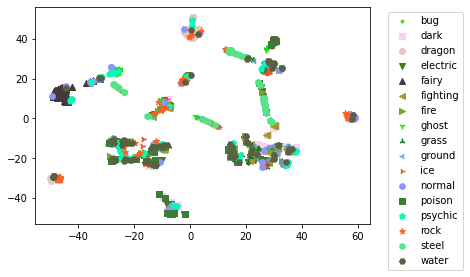

In [18]:
colors = generateRandomRGB(len(y_train.unique()))
plotData(X_train_reduced, y_train, colors)

# Apply KMeans

In [19]:
from sklearn.cluster import KMeans

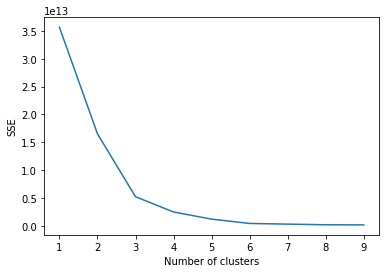

In [20]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(X_train)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
X_train_kmeans = X_train.copy()
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=0).fit(X_train)
X_train_kmeans["centroid"] = kmeans.fit_predict(X_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


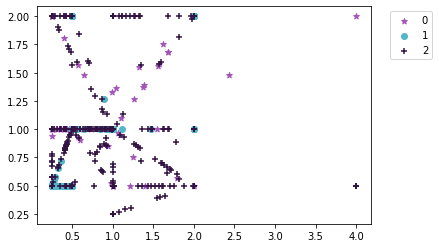

In [24]:
# Visualize the TSNE reduced features with kmeans
plotData(X_train.to_numpy(), X_train_kmeans["centroid"], markers=["*", 'o', '+'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


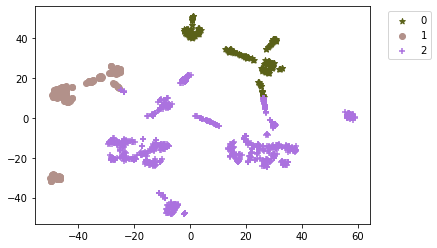

In [23]:
# Plot the first 2 features of X_train with their clusters
plotData(X_train_reduced, X_train_kmeans["centroid"], markers=["*", 'o', '+'])

# Tuning PCA n_components with Baseline Models

In [25]:
from sklearn.decomposition import PCA

In [26]:
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        pca = PCA(n_components=i, random_state=0)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        clf.fit(X_train_pca, y_train)
        preds = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
    return accs

def visualize_accs(baseline_acc, pca_accs, clf_name, operation='PCA', xlabel='n_components'):
    plt.plot(pca_accs, label=f'{operation} {clf_name} Accuracy')
    plt.plot([baseline_acc]*len(pca_accs), label=f'Baseline {clf_name} Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

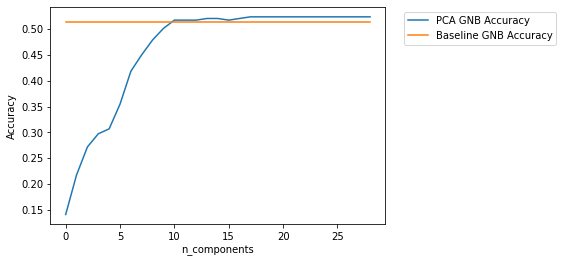

In [27]:
accs = tune_pca(GaussianNB(), X_train, y_train, X_test, y_test, 1, 30)
visualize_accs(baseline_gnb_accuracy, accs, "GNB")

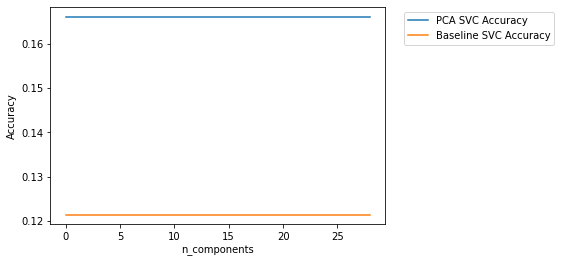

In [28]:
accs = tune_pca(baseline_svc_clf, X_train, y_train, X_test, y_test, 1, 30)
visualize_accs(baseline_svc_acc, accs, "SVC")

According to both plots, 10 is the best number of components.

In [29]:
pca = PCA(n_components=10, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Feature Selection by Filtering

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

In [31]:
def select_features(X_train, y_train, X_test, y_test, clf, fs):
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    X_test_best_features = fs.transform(X_test) 
    clf.fit(X_train_best_features, y_train)
    y_pred = clf.predict(X_test_best_features)
    acc = accuracy_score(y_test, y_pred)
    return acc

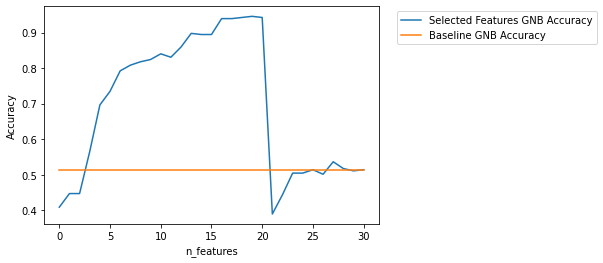

In [60]:
accs = []
for n in range(2, 33):
    fs =  SelectKBest(f_classif, k=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_gnb_clf, fs)
    accs.append(acc)
visualize_accs(baseline_gnb_accuracy, accs, "GNB", operation='Selected Features', xlabel='n_features')

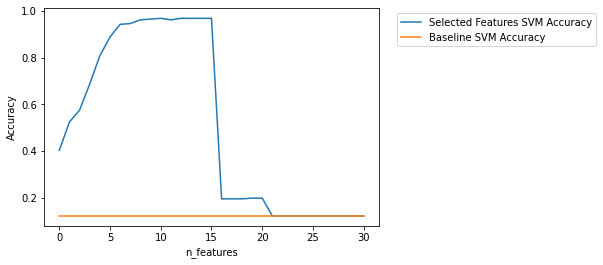

In [71]:
accs = []
for n in range(2, 33):
    fs =  SelectKBest(f_classif, k=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_svc_clf, fs)
    accs.append(acc)
visualize_accs(baseline_svc_acc, accs, "SVM", operation='Selected Features', xlabel='n_features')

# Feature Selection by Wrapping

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector

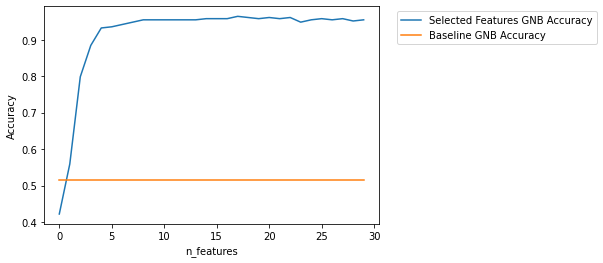

In [37]:
accs = []
for n in range(2,32):
    print(f"n_features = {n}")
    fs = SequentialFeatureSelector(baseline_gnb_clf, n_features_to_select=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_gnb_clf, fs)
    accs.append(acc)

gnb_wrapper_best_n = np.argmax(accs) + 2
visualize_accs(baseline_gnb_accuracy, accs, "GNB", operation='Selected Features', xlabel='n_features')

With less than 10 features, Gaussian NB is achieving more than 90% accuracy. This accuracy remains high until 31 features, meaning that there was only one specific (the 32nd feature) that has been driving the accuracy down. This feature is experience_growth as shown below.

In [59]:
clf = GaussianNB()

fs = SequentialFeatureSelector(clf, n_features_to_select=31)
fs.fit(X_train, y_train)

good_features = X_train.columns[fs.get_support()]
set(X_train.columns) - set(good_features)

{'experience_growth'}

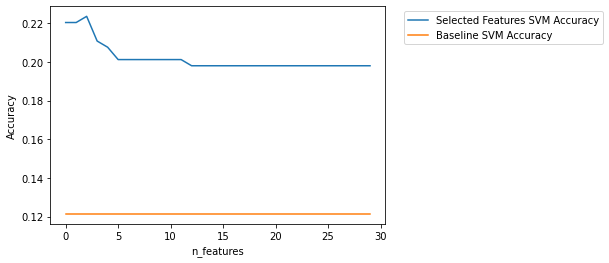

In [38]:
accs = []
for n in range(2, 32):
    print(f"n_features = {n}")
    fs = SequentialFeatureSelector(baseline_svc_clf, n_features_to_select=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_svc_clf, fs)
    accs.append(acc)

svm_wrapper_best_n = np.argmax(accs) + 2
visualize_accs(baseline_svc_acc, accs, "SVM", operation='Selected Features', xlabel='n_features')